In [1]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.utils import shuffle
from sklearn.manifold import TSNE
from scipy import stats
from scipy.stats import ttest_ind
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.evaluate import paired_ttest_5x2cv
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_train = pd.read_csv('/content/drive/My Drive/Project/data/human-activity-recognition-with-smartphones/train.csv')
data_test = pd.read_csv('/content/drive/My Drive/Project/data/human-activity-recognition-with-smartphones/test.csv')

In [5]:
data_train.shape

(7352, 563)

In [6]:
data_test.shape

(2947, 563)

In [7]:
#if any duplicate value
print('train : ',sum(data_train.duplicated()))
print('test : ', sum(data_test.duplicated()))

train :  0
test :  0


In [8]:
#if any null value
print('train : ', data_train.isna().values.sum())
print('test : ', data_test.isna().values.sum())

train :  0
test :  0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


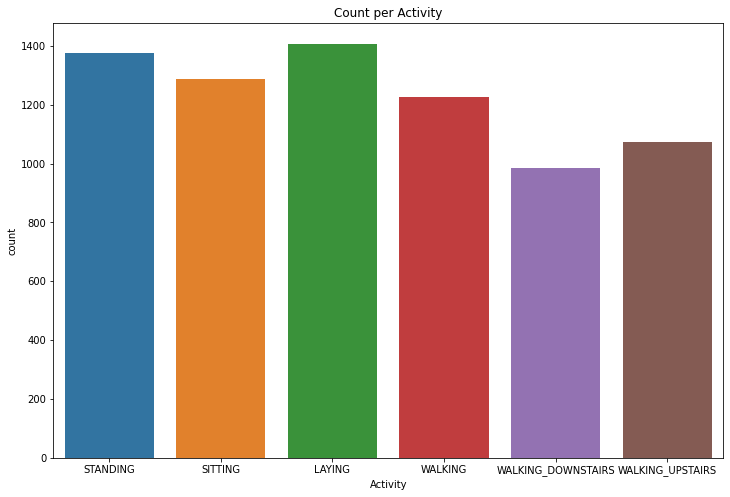

In [9]:
#different activity on train data
plt.figure(figsize=(12,8))
plt.title('Count per Activity')
sns.countplot(data_train.Activity)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

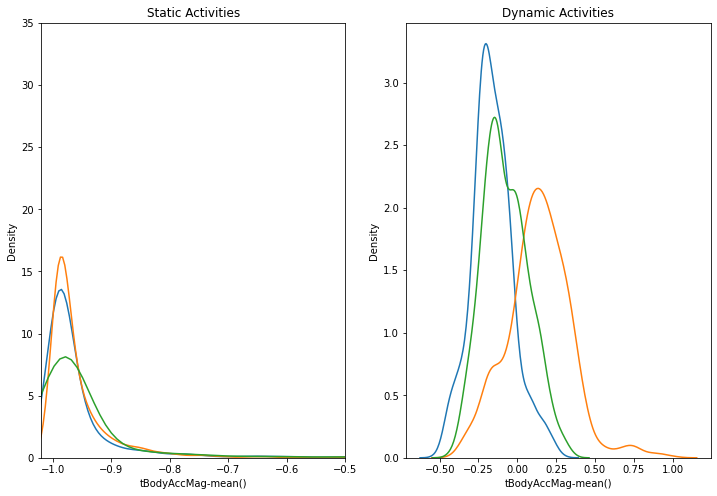

In [10]:
#static and dynamic activity
# some codes are taken from: https://www.kaggle.com/vikashrajluhaniwal/eda-all-classification-algorithms-with-96-acc
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities")
sns.distplot(data_train[data_train["Activity"]=="SITTING"]['tBodyAccMag-mean()'],hist = False, label = 'Sitting')
sns.distplot(data_train[data_train["Activity"]=="STANDING"]['tBodyAccMag-mean()'],hist = False,label = 'Standing')
sns.distplot(data_train[data_train["Activity"]=="LAYING"]['tBodyAccMag-mean()'],hist = False, label = 'Laying')
plt.axis([-1.02, -0.5, 0, 35])
plt.subplot(1,2,2)
plt.title("Dynamic Activities")
sns.distplot(data_train[data_train["Activity"]=="WALKING"]['tBodyAccMag-mean()'],hist = False, label = 'Sitting')
sns.distplot(data_train[data_train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMag-mean()'],hist = False,label = 'Standing')
sns.distplot(data_train[data_train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMag-mean()'],hist = False, label = 'Laying')

In [11]:
X_train = data_train.iloc[:, 0:562]
Y_train = data_train.iloc[:,562:563]

In [12]:
X_test = data_test.iloc[:, 0:562]
Y_test= data_test.iloc[:,562:563]

In [ ]:
Y_test.shape

(2947, 1)

In [ ]:
output_labels = ["Dummy","STANDING", "SITTING", "LAYING","WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]
Y_train_all = Y_train['Activity'].apply(output_labels.index)
Y_test_all = Y_test['Activity'].apply(output_labels.index)

In [ ]:
Y_test_all.shape

(2947,)

In [ ]:
# trying to select features by computing ANOVA F-value for the provided sample
framesX = [X_train, X_test]
resultX = pd.concat(frames)
resultX.shape

framesY = [Y_train_all, Y_test_all]
resultY = pd.concat(framesY)
resultY.shape

X_new = SelectKBest(f_classif, k=550).fit_transform(resultX, resultY)

X_new_train = X_new[0:7352,:]
X_new_test = X_new[7352:10299,:]

model_SVM = SVC(kernel='linear', C=0.1).fit(X_new_train, Y_train_all)
y_predict = model_SVM.predict(X_new_test)
print('Accuracy score:', accuracy_score(Y_test_all, y_predict))

Accuracy score: 0.961316593146


In [ ]:
models = [
    SVC(),
    MLPClassifier(),
    LogisticRegression()
         ]

In [ ]:
# Three models with sklearn default parameter 
model_name = []
model_scores = []

for model in models:
    model_out = model.fit(X_train, Y_train_all)
    prediction = model_out.predict(X_test)
    
    model_name.append(model_out.__class__.__name__)
    model_scores.append(accuracy_score(prediction, Y_test_all))

all_score = pd.DataFrame({'Model': model_name, 'Score': model_scores}).set_index('Model')
all_score

,Score
Model,
SVC,0.930777
MLPClassifier,0.934849
LogisticRegression,0.961317


In [ ]:
# Three models with sklearn default parameter 
model_name = []
model_scores = []

for model in models:
    model_out = model.fit(X_train, Y_train_all)
    prediction = model_out.predict(X_test)
    
    model_name.append(model_out.__class__.__name__)
    model_scores.append(accuracy_score(prediction, Y_test_all))

all_score = pd.DataFrame({'Model': model_name, 'Score': model_scores}).set_index('Model')
all_score

,Score
Model,
SVC,0.930777
MLPClassifier,0.946047
LogisticRegression,0.961317


In [ ]:
# Finding best parameter for SVM

parameters = {
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'C': [100, 10, 5, 2, 1, 0.5, 0.1]
}

selector = GridSearchCV(SVC(), parameters, scoring='accuracy', cv = 5) # Stratified 5 fold
selector.fit(X_train, Y_train_all)

print('Best parameter set found:')
print(selector.best_params_)

print('Detailed grid scores:')
means = selector.cv_results_['mean_test_score']
stds = selector.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, selector.cv_results_['params']):
    print('%0.3f (+/-%0.03f) for %r' % (mean, std * 2, params))
    print()

Best parameter set found:
{'C': 0.1, 'kernel': 'linear'}
Detailed grid scores:
0.931 (+/-0.055) for {'C': 100, 'kernel': 'linear'}

0.884 (+/-0.120) for {'C': 100, 'kernel': 'rbf'}

0.246 (+/-0.148) for {'C': 100, 'kernel': 'sigmoid'}

0.933 (+/-0.057) for {'C': 10, 'kernel': 'linear'}

0.889 (+/-0.097) for {'C': 10, 'kernel': 'rbf'}

0.246 (+/-0.149) for {'C': 10, 'kernel': 'sigmoid'}

0.933 (+/-0.054) for {'C': 5, 'kernel': 'linear'}

0.895 (+/-0.089) for {'C': 5, 'kernel': 'rbf'}

0.240 (+/-0.149) for {'C': 5, 'kernel': 'sigmoid'}

0.935 (+/-0.056) for {'C': 2, 'kernel': 'linear'}

0.890 (+/-0.072) for {'C': 2, 'kernel': 'rbf'}

0.240 (+/-0.152) for {'C': 2, 'kernel': 'sigmoid'}

0.936 (+/-0.057) for {'C': 1, 'kernel': 'linear'}

0.884 (+/-0.058) for {'C': 1, 'kernel': 'rbf'}

0.245 (+/-0.163) for {'C': 1, 'kernel': 'sigmoid'}

0.936 (+/-0.057) for {'C': 0.5, 'kernel': 'linear'}

0.879 (+/-0.043) for {'C': 0.5, 'kernel': 'rbf'}

0.255 (+/-0.172) for {'C': 0.5, 'kernel': 'sigmoid'}



In [ ]:
# testing with best parameters
model_SVM = SVC(kernel='linear', C=0.1).fit(X_train, Y_train_all)
y_predict_SVM = model_SVM.predict(X_test)
print('Accuracy score:', accuracy_score(Y_test_all, y_predict_SVM))

Accuracy score: 0.961995249406


In [ ]:
# testing with best parameters.. average performance
avg_svm = 0
avg_svm_precision = 0
avg_svm_recall = 0
avg_svm_f1 = 0

for i in range(5):
    X_train, Y_train_all = shuffle(X_train, Y_train_all, random_state=0)
    X_test, Y_test_all = shuffle(X_test, Y_test_all, random_state=0)
    model_SVM = SVC(kernel='linear', C=1.0).fit(X_train, Y_train_all)
    y_predict_SVM = model_SVM.predict(X_test)
    print('Accuracy score:', accuracy_score(Y_test_all, y_predict_SVM))
    
    avg_svm = avg_svm + accuracy_score(Y_test_all, y_predict_SVM)
    avg_svm_precision = avg_svm_precision + precision_score(Y_test_all, y_predict_SVM, average = 'weighted')
    avg_svm_recall = avg_svm_recall + recall_score(Y_test_all, y_predict_SVM, average = 'weighted')
    avg_svm_f1 = avg_svm_f1 + f1_score(Y_test_all, y_predict_SVM, average = 'weighted')
    
print(avg_svm/5, avg_svm_precision/5, avg_svm_recall/5, avg_svm_f1/5)

Accuracy score: 0.963352561927
Accuracy score: 0.963352561927
Accuracy score: 0.963352561927
Accuracy score: 0.963352561927
Accuracy score: 0.963352561927
0.963352561927 0.964440221429 0.963352561927 0.963259646951


In [ ]:
# testing with best parameters
model_SVM = SVC(kernel='linear', C=1.0).fit(X_train, Y_train_all)
y_predict_SVM = model_SVM.predict(X_test)
print('Accuracy score:', accuracy_score(Y_test_all, y_predict_SVM))
print(classification_report(Y_test_all, y_predict_SVM))

Accuracy score: 0.963352561927
             precision    recall  f1-score   support

          1       0.90      0.97      0.94       532
          2       0.96      0.89      0.92       491
          3       1.00      1.00      1.00       537
          4       0.95      1.00      0.97       496
          5       0.99      0.98      0.98       420
          6       0.98      0.95      0.97       471

avg / total       0.96      0.96      0.96      2947



In [ ]:
# Finding best parameter for ANN

parameters = {
    'hidden_layer_sizes': [(10,),(50,),(100,),(1000,)],
    'alpha': [1e-4, 1e-3, 1e-2],
    'learning_rate_init': [1e-3, 1e-2, 1e-1],
    'beta_1' : [0.1, 0.5, 0.9],
    'beta_2' : [0.1, 0.5, 0.9]
}

selector = GridSearchCV(MLPClassifier(), parameters, scoring='accuracy', cv = 5) # Stratified 5 fold
selector.fit(X_train, Y_train_all)

print('Best parameter set found:')
print(selector.best_params_)

print('Detailed grid scores:')
means = selector.cv_results_['mean_test_score']
stds = selector.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, selector.cv_results_['params']):
    print('%0.3f (+/-%0.03f) for %r' % (mean, std * 2, params))
    print()

Best parameter set found:
{'alpha': 0.01, 'beta_1': 0.9, 'beta_2': 0.9, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001}
Detailed grid scores:
0.921 (+/-0.040) for {'alpha': 0.0001, 'beta_1': 0.1, 'beta_2': 0.1, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.001}

0.890 (+/-0.083) for {'alpha': 0.0001, 'beta_1': 0.1, 'beta_2': 0.1, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.01}

0.504 (+/-0.131) for {'alpha': 0.0001, 'beta_1': 0.1, 'beta_2': 0.1, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.1}

0.919 (+/-0.044) for {'alpha': 0.0001, 'beta_1': 0.1, 'beta_2': 0.1, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001}

0.895 (+/-0.043) for {'alpha': 0.0001, 'beta_1': 0.1, 'beta_2': 0.1, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01}

0.698 (+/-0.130) for {'alpha': 0.0001, 'beta_1': 0.1, 'beta_2': 0.1, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.1}

0.914 (+/-0.071) for {'alpha': 0.0001, 'beta_1': 0.1, 'beta_2': 0.1, 'hidden_layer_siz

In [ ]:
# testing with best parameters.. average performance
avg_ann = 0
avg_ann_precision = 0
avg_ann_recall = 0
avg_ann_f1 = 0

for i in range(5):
    X_train, Y_train_all = shuffle(X_train, Y_train_all, random_state=0)
    X_test, Y_test_all = shuffle(X_test, Y_test_all, random_state=0)
    model_ANN = MLPClassifier(hidden_layer_sizes= (50,), alpha= 0.01, learning_rate_init = 0.001, beta_1= 0.9, beta_2= 0.9).fit(X_train, Y_train_all)
    y_predict_ANN = model_ANN.predict(X_test)
    print('Accuracy score:', accuracy_score(Y_test_all, y_predict_ANN))
    avg_ann = avg_ann + accuracy_score(Y_test_all, y_predict_ANN)
    avg_ann_precision = avg_ann_precision + precision_score(Y_test_all, y_predict_ANN, average = 'weighted')
    avg_ann_recall = avg_ann_recall + recall_score(Y_test_all, y_predict_ANN, average = 'weighted')
    avg_ann_f1 = avg_ann_f1 + f1_score(Y_test_all, y_predict_ANN, average = 'weighted')
    
print(avg_ann/5,avg_ann_precision/5, avg_ann_recall/5, avg_ann_f1/5)

Accuracy score: 0.942314217849
Accuracy score: 0.949440108585
Accuracy score: 0.928741092637
Accuracy score: 0.930437733288
Accuracy score: 0.942992874109
0.938785205294 0.943074767496 0.938785205294 0.938789805376


In [ ]:
# testing with best parameters
model_ANN = MLPClassifier(hidden_layer_sizes= (50,), alpha= 0.01, learning_rate_init = 0.001, beta_1= 0.9, beta_2= 0.9).fit(X_train, Y_train_all)
y_predict_ANN = model_ANN.predict(X_test)
print('Accuracy score:', accuracy_score(Y_test_all, y_predict_ANN))
print(classification_report(Y_test_all, y_predict_ANN))

Accuracy score: 0.9440108585
             precision    recall  f1-score   support

          1       0.90      0.92      0.91       532
          2       0.92      0.91      0.91       491
          3       1.00      0.98      0.99       537
          4       0.93      0.98      0.96       496
          5       0.98      0.94      0.96       420
          6       0.95      0.92      0.93       471

avg / total       0.94      0.94      0.94      2947



In [ ]:
# testing with best parameters
model_ANN = MLPClassifier(hidden_layer_sizes= (1000,), alpha= 0.01, learning_rate_init = 0.001, beta_1= 0.9, beta_2= 0.9).fit(X_train, Y_train_all)
y_predict_ANN = model_ANN.predict(X_test)
print('Accuracy score:', accuracy_score(Y_test_all, y_predict_ANN))

Accuracy score: 0.934170342721


In [ ]:
# Finding best parameter for LR

parameters = {
    'penalty': ['l1', 'l2'],
    'C': [10, 5, 2, 1, 0.5, 0.1]
}

selector = GridSearchCV(LogisticRegression(), parameters, scoring='accuracy', cv = 5) # Stratified 5 fold
selector.fit(X_train, Y_train_all)

print('Best parameter set found:')
print(selector.best_params_)

print('Detailed grid scores:')
means = selector.cv_results_['mean_test_score']
stds = selector.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, selector.cv_results_['params']):
    print('%0.3f (+/-%0.03f) for %r' % (mean, std * 2, params))
    print()

Best parameter set found:
{'C': 2, 'penalty': 'l1'}
Detailed grid scores:
0.938 (+/-0.051) for {'C': 10, 'penalty': 'l1'}

0.939 (+/-0.057) for {'C': 10, 'penalty': 'l2'}

0.939 (+/-0.049) for {'C': 5, 'penalty': 'l1'}

0.938 (+/-0.057) for {'C': 5, 'penalty': 'l2'}

0.941 (+/-0.048) for {'C': 2, 'penalty': 'l1'}

0.939 (+/-0.054) for {'C': 2, 'penalty': 'l2'}

0.940 (+/-0.050) for {'C': 1, 'penalty': 'l1'}

0.938 (+/-0.055) for {'C': 1, 'penalty': 'l2'}

0.939 (+/-0.045) for {'C': 0.5, 'penalty': 'l1'}

0.936 (+/-0.053) for {'C': 0.5, 'penalty': 'l2'}

0.924 (+/-0.048) for {'C': 0.1, 'penalty': 'l1'}

0.929 (+/-0.053) for {'C': 0.1, 'penalty': 'l2'}



In [ ]:
# testing with best parameters.. average performance
avg_lr = 0
avg_lr_precision = 0
avg_lr_recall = 0
avg_lr_f1 = 0

for i in range(5):
    X_train, Y_train_all = shuffle(X_train, Y_train_all, random_state=0)
    X_test, Y_test_all = shuffle(X_test, Y_test_all, random_state=0)
    model_LR = LogisticRegression(penalty='l1', C=2.0).fit(X_train, Y_train_all)
    y_predict_LR = model_LR.predict(X_test)
    print('Accuracy score:', accuracy_score(Y_test_all, y_predict_LR))
    avg_lr = avg_lr + accuracy_score(Y_test_all, y_predict_LR)
    avg_lr_precision = avg_lr_precision + precision_score(Y_test_all, y_predict_LR, average = 'macro')
    avg_lr_recall = avg_lr_recall + recall_score(Y_test_all, y_predict_LR, average = 'macro')
    avg_lr_f1 = avg_lr_f1 + f1_score(Y_test_all, y_predict_LR, average = 'macro')
    
print(avg_lr/5, avg_lr_precision/5, avg_lr_recall/5, avg_lr_f1/5)

Accuracy score: 0.959619952494
Accuracy score: 0.960977265015
Accuracy score: 0.959959280624
Accuracy score: 0.959959280624
Accuracy score: 0.960298608755
0.960162877503 0.963629977178 0.959449694638 0.960332966338


In [ ]:
 # testing LR with best parameters
model_LR = LogisticRegression(penalty='l1', C=2.0).fit(X_train, Y_train_all)
y_predict_LR = model_LR.predict(X_test)
print('Accuracy score:', accuracy_score(Y_test_all, y_predict_LR))
print(classification_report(Y_test_all, y_predict_LR))

Accuracy score: 0.960298608755
             precision    recall  f1-score   support

          1       0.89      0.98      0.93       532
          2       0.98      0.86      0.91       491
          3       1.00      1.00      1.00       537
          4       0.94      1.00      0.97       496
          5       1.00      0.97      0.98       420
          6       0.97      0.95      0.96       471

avg / total       0.96      0.96      0.96      2947



In [ ]:
# Welch’s t-test

from sklearn.model_selection import train_test_split

X_wttest = []
Y_wttest = []

for i in range(5):
    X_ttest, X_ttest1, y_ttest, y_ttest1 = train_test_split(X_test, Y_test_all,
                                                stratify=Y_test_all, 
                                                test_size=0.5)
    

    X_wttest.append(X_ttest)
    X_wttest.append(X_ttest1)
    Y_wttest.append(y_ttest)
    Y_wttest.append(y_ttest1)

In [ ]:
model_SVM_scores = []
model_ANN_scores = []
model_LR_scores = []

for j in range(10):
    # t-testing SVM with best parameters
    #model_SVM = SVC(kernel='linear', C=1.0).fit(X_train, Y_train_all)
    y_predict_SVM = model_SVM.predict(X_wttest[j])
    print('Accuracy score SVM:', accuracy_score(Y_wttest[j], y_predict_SVM))
    accuracy = accuracy_score(Y_wttest[j], y_predict_SVM)
    model_SVM_scores.append(accuracy)
    
    # ttesting ANN with best parameters
    #model_ANN = MLPClassifier(hidden_layer_sizes= (50,), alpha= 0.01, learning_rate_init = 0.001, beta_1= 0.9, beta_2= 0.9).fit(X_train, Y_train_all)
    y_predict_ANN = model_ANN.predict(X_wttest[j])
    print('Accuracy score ANN:', accuracy_score(Y_wttest[j], y_predict_ANN))
    accuracy = accuracy_score(Y_wttest[j], y_predict_ANN)
    model_ANN_scores.append(accuracy)
    
    # ttesting LR with best parameters
    #model_LR = LogisticRegression(penalty='l1', C=2.0).fit(X_train, Y_train_all)
    y_predict_LR = model_LR.predict(X_wttest[j])
    print('Accuracy score LR:', accuracy_score(Y_wttest[j], y_predict_LR))
    accuracy = accuracy_score(Y_wttest[j], y_predict_LR)
    model_LR_scores.append(accuracy)
    

Accuracy score SVM: 0.967413441955
Accuracy score ANN: 0.951120162933
Accuracy score LR: 0.965376782077
Accuracy score SVM: 0.959294436906
Accuracy score ANN: 0.946404341927
Accuracy score LR: 0.955902306649
Accuracy score SVM: 0.965376782077
Accuracy score ANN: 0.957230142566
Accuracy score LR: 0.9633401222
Accuracy score SVM: 0.961329715061
Accuracy score ANN: 0.940298507463
Accuracy score LR: 0.957937584803
Accuracy score SVM: 0.962661235574
Accuracy score ANN: 0.949083503055
Accuracy score LR: 0.961982348948
Accuracy score SVM: 0.964043419267
Accuracy score ANN: 0.948439620081
Accuracy score LR: 0.959294436906
Accuracy score SVM: 0.962661235574
Accuracy score ANN: 0.951799049559
Accuracy score LR: 0.961303462322
Accuracy score SVM: 0.964043419267
Accuracy score ANN: 0.945725915875
Accuracy score LR: 0.959972862958
Accuracy score SVM: 0.965376782077
Accuracy score ANN: 0.95655125594
Accuracy score LR: 0.962661235574
Accuracy score SVM: 0.961329715061
Accuracy score ANN: 0.9409769335

In [ ]:
model_SVM_scores

[0.96741344195519352,
 0.95929443690637717,
 0.96537678207739308,
 0.96132971506105835,
 0.96266123557365924,
 0.96404341926729986,
 0.96266123557365924,
 0.96404341926729986,
 0.96537678207739308,
 0.96132971506105835]

In [ ]:
model_ANN_scores

[0.95112016293279023,
 0.94640434192672995,
 0.95723014256619143,
 0.94029850746268662,
 0.94908350305498979,
 0.94843962008141114,
 0.95179904955872374,
 0.94572591587516963,
 0.95655125594025803,
 0.94097693351424694]

In [ ]:
model_LR_scores

[0.96537678207739308,
 0.95590230664857534,
 0.96334012219959264,
 0.95793758480325641,
 0.96198234894772572,
 0.95929443690637717,
 0.96130346232179231,
 0.9599728629579376,
 0.96266123557365924,
 0.95861601085481685]

In [ ]:
# t-test SVM vs ANN

value, pvalue = ttest_ind(model_SVM_scores, model_ANN_scores, equal_var=True)

print(value, pvalue)

if pvalue > 0.05:
    print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
    print('Samples are likely drawn from different distributions (reject H0)')


7.44507369022 6.71685176457e-07
Samples are likely drawn from different distributions (reject H0)


In [ ]:
# t-test SVM vs LR

value, pvalue = ttest_ind(model_SVM_scores, model_LR_scores, equal_var=True)

print(value, pvalue)

if pvalue > 0.05:
    print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
    print('Samples are likely drawn from different distributions (reject H0)')

2.31800378744 0.0324233074802
Samples are likely drawn from different distributions (reject H0)


In [ ]:
# t-test CNN vs LR

value, pvalue = ttest_ind(model_LR_scores, model_ANN_scores, equal_var=True)

print(value, pvalue)

if pvalue > 0.05:
    print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
    print('Samples are likely drawn from different distributions (reject H0)')

5.8846395325 1.42856979399e-05
Samples are likely drawn from different distributions (reject H0)


In [ ]:
#5 fold 2 cross validation t test SVM vs ANN
t, p = paired_ttest_5x2cv(estimator1=model_SVM,
                          estimator2=model_ANN,
                          X=resultX, y=resultY,
                          random_seed=1)

print(t, p)

if p > 0.05:
    print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
    print('Samples are likely drawn from different distributions (reject H0)')

3.2429419014047856 0.02287438894007764
Samples are likely drawn from different distributions (reject H0)


In [ ]:
#5 fold 2 cross validation t test ANN vs SVM
t, p = paired_ttest_5x2cv(estimator1=model_ANN,
                          estimator2=model_SVM,
                          X=resultX, y=resultY,
                          random_seed=1)

print(t, p)

if p > 0.05:
    print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
    print('Samples are likely drawn from different distributions (reject H0)')

-4.654560930556191 0.0055592411178122456
Samples are likely drawn from different distributions (reject H0)


In [ ]:
#5 fold 2 cross validation t test SVM vs LR
t, p = paired_ttest_5x2cv(estimator1=model_SVM,
                          estimator2=model_LR,
                          X=resultX, y=resultY,
                          random_seed=1)

print(t, p)

if p > 0.05:
    print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
    print('Samples are likely drawn from different distributions (reject H0)')

1.174621183435272 0.2930372231193825
Samples are likely drawn from the same distributions (fail to reject H0)


In [ ]:
#5 fold 2 cross validation t test LR vs SVM
t, p = paired_ttest_5x2cv(estimator1=model_LR,
                          estimator2=model_SVM,
                          X=resultX, y=resultY,
                          random_seed=1)

print(t, p)

if p > 0.05:
    print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
    print('Samples are likely drawn from different distributions (reject H0)')

-0.6326421942850714 0.5547657913251776
Samples are likely drawn from the same distributions (fail to reject H0)


In [ ]:
#5 fold 2 cross validation t test LR vs ANN
t, p = paired_ttest_5x2cv(estimator1=model_LR,
                          estimator2=model_ANN,
                          X=resultX, y=resultY,
                          random_seed=1)

print(t, p)

if p > 0.05:
    print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
    print('Samples are likely drawn from different distributions (reject H0)')

2.7391890834955963 0.04083141243998926
Samples are likely drawn from different distributions (reject H0)


In [ ]:
#5 fold 2 cross validation t test ANN vs LR
t, p = paired_ttest_5x2cv(estimator1=model_ANN,
                          estimator2=model_LR,
                          X=resultX, y=resultY,
                          random_seed=1)

print(t, p)

if p > 0.05:
    print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
    print('Samples are likely drawn from different distributions (reject H0)')

-6.1101240688023655 0.0017015706456311444
Samples are likely drawn from different distributions (reject H0)
